In [2]:
pip install opencv-python 

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cmake

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/36.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/36.2 MB 100.9 kB/s eta 0:05:59
   ---------------------------------------- 0.1/36.2 MB 234.9 kB/s eta 0:02:34
   ---------------------------------------- 0.1/36.2 MB 234.9 kB/s eta 0:02:34
   ---------------------------------------- 0.1/36.2 MB 281.0 kB/s eta 0:02:09
   ---------------------------------------- 0.1/36.2 MB 281.0 kB/s eta 0:02:09
   ---------------------------------------- 0.1/36.2 MB 291.9 kB/s eta 0:02:04
   -------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [8]:
!pip install face_recognition

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import face_recognition
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

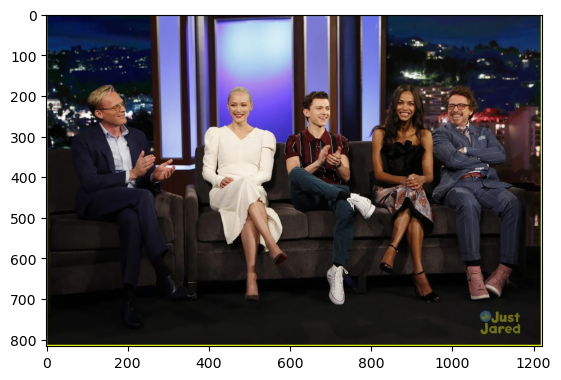

In [6]:
%matplotlib inline

img = mpimg.imread('tm2.webp')
imgplot = plt.imshow(img)
plt.show()

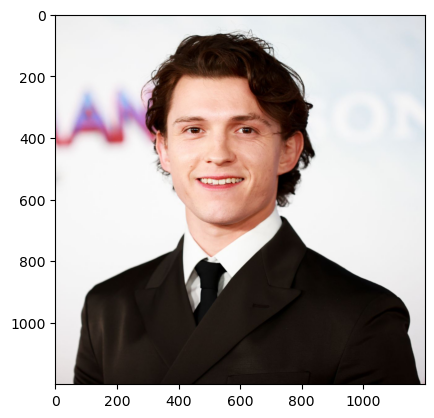

In [7]:
img2 = mpimg.imread('tm1.jpg')
imgplot = plt.imshow(img2)
plt.show()

In [8]:
def compare_and_mark_faces(main_image_path, target_image_path):
    
    # Load the main image and the target image
    main_image = face_recognition.load_image_file(main_image_path)
    target_image = face_recognition.load_image_file(target_image_path)

    # Find face locations and face encodings for the main and target images
    main_face_locations = face_recognition.face_locations(main_image)
    target_face_locations = face_recognition.face_locations(target_image)
    
    main_face_encodings = face_recognition.face_encodings(main_image, main_face_locations)
    target_face_encodings = face_recognition.face_encodings(target_image, target_face_locations)

    # Create a copy of the main image for visualization
    main_image_marked = np.copy(main_image)

    # Iterate through faces in the main image
    for main_face_location, main_face_encoding in zip(main_face_locations, main_face_encodings):
        # Compare the face encoding with all face encodings in the target image
        results = face_recognition.compare_faces(target_face_encodings, main_face_encoding)

        # Check if there is at least one match
        if True in results:
            # Find the index of the first matching face in the target image
            target_index = results.index(True)

            # Draw a red bounding box around the matching face in the main image
            top, right, bottom, left = main_face_location
            cv2.rectangle(main_image_marked, (left, top), (right, bottom), (0, 255, 0), 6)

    # Display the marked main image
    #cv2.imshow('Face Matching with Marking', main_image_marked)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    
    plt.imshow(main_image_marked)
    plt.axis('off')  # Turn off axis labels
    plt.show()





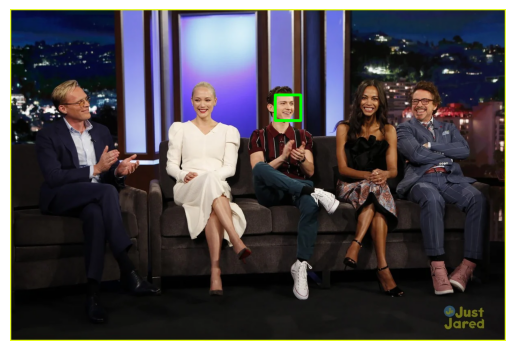

In [9]:
# Specify the paths to the main image and the target image
main_image_path = "tm2.webp"
#main_image_path = "duals.jpg"
target_image_path = "tm1.jpg"
#target_image_path = "target_template_II.jpg"
# Call the function for face comparison and marking
compare_and_mark_faces(main_image_path, target_image_path)

In [ ]:
#Note : most image processing libraries use RGB but opencv use BGR